# Numerical Linear Regression

## Steps

1. Gradient descent with one variable
2. Newton method with one variable
3. Gradient descent with two (and more) variables
4.  Newton method with two (and more) variables

## Imports

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


## Gradient descent with one variable 

Let us start a simple linear model $Y = aX$ with one feature $X$ and one response $Y$, a slope of $a$ that is to be learned assuming an intercept $b=0$.

We generate data for $Y=2X, X\in [1,10]$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

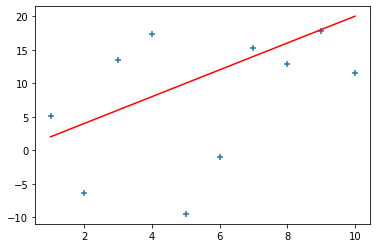

In [133]:
random_generator = np.random.default_rng(42)
N = 10;
a0 = 2;
X = np.arange(1,N+1)
Y = a0*X + N*random_generator.standard_normal(X.shape)
plt.scatter(X,Y,marker='+')
plt.plot(X,a0*X,'r')
plt.show()

We learn $\hat a$ from the data and expect it to be $\approx 2$. Therefore, we minimize the residual sum of squares as our loss function, i.e., $\hat a = \min \arg RSS(a)$ where $RSS(a) =\sum_{i=1}^{n}(y_i - a x_i)^2$.  

For the sake of demonstrating the numerical approach, we deliberately ignore that an analytic solution exists. 

Let's define and plot $RSS$ as a function of $a$. We chose the range of $a$ around the (actually unknown) minimum of $\approx 2$. 

In [134]:
def arrayfun1(f,A):
    Z = np.zeros(A.shape)
    for row in range(A.shape[0]):
        Z[row] = f(A[row])
    return Z

def arrayfun2(f,A,B):
    Z = np.zeros(A.shape)
    for row in range(A.shape[0]):
        for col in range(A.shape[1]):
            Z[row,col] = f(A[row,col],B[row,col])
    return Z


In [135]:
def rss(a, X, Y):
    return np.sum( (Y-(a*X))**2)

def plot_rss(f,a_range, show=False, c="b"):
    err_range = arrayfun1(f, a_range)
    plt.plot(a_range,err_range,c=c)
    if show:
        plt.show()

err = 896.8786965549846


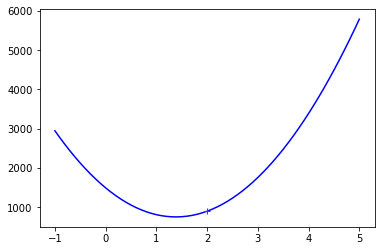

In [136]:
f = lambda a: rss(a,X,Y)
a_range = np.linspace(a0-3,a0+3,61)
plot_rss(f,a_range)
plt.plot(a0,f(a0),'+r')
err = f(a0)
print("err =",err)

The gradient of $RSS(a)$ for any $a$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a) &= \frac{\partial RSS(a)}{\partial a}\\
&=\frac{\partial \sum_{i=1}^{n}(y_i- a x_i)^2}{\partial a}\\
&=\sum_{i=1}^{n}2(y_i- a x_i)(-x_i)\\
&=-2\sum_{i=1}^{n}(y_i- a x_i)x_i
\end{aligned}
$$

In [137]:
def grad_rss(a, X, Y):
    return -2*np.sum((Y - a*X)*X);

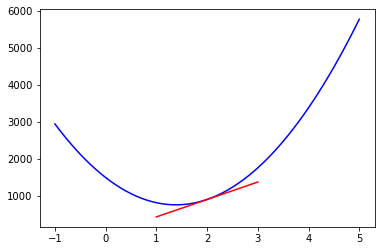

In [138]:
ff = lambda a: grad_rss(a,X,Y)
fff = lambda a: (a-a0)*ff(a0)+f(a0)
plot_rss(f,np.linspace(a0-3,a0+3,61))
plot_rss(fff,np.linspace(a0-1,a0+1,61), False, "r")
plt.show()

We iteratively approximate $\hat a$ with gradient descent, i.e., starting with an initial guess $a_0$ and a learning rate of $\varepsilon$ we iterate over

$$
\begin{aligned}
a_{k+1} &= a_k - \varepsilon \nabla RSS(a_k) \\
&= a_k + 2 \varepsilon \sum_{i=1}^{n}(y_i- a_k x_i)x_i
\end{aligned}
$$

In [139]:
def grad_desc_rss(K, a0, learning_eps, f, ff, verbose):
    a_s = np.zeros(K+1)
    a_s[0] = a0
    for k in range(K):
        a_s[k+1]= a_s[k] - learning_eps * ff(a_s[k])
        if verbose:
            plt.plot([a_s[k],a_s[k+1]],[f(a_s[k]),f(a_s[k+1])], c="y", linestyle="dashed",linewidth=1)
    if verbose:
        a_range = np.linspace(np.min(a_s)-1,np.amax(a_s)+1,61)
        plot_rss(f,a_range)
        
        fff = lambda a: (a-a0)*ff(a0)+f(a0)
        a_range = np.linspace(a0-1,a0+1,61)
        plot_rss(fff,a_range, False, "r")
        
        fff = lambda a: (a-a_s[k+1]) * ff(a_s[k+1]) + f(a_s[k+1])
        a_range = np.linspace(a_s[k+1]-1,a_s[k+1]+1,61)
        plot_rss(fff,a_range, False, "g");
        
    return a_s

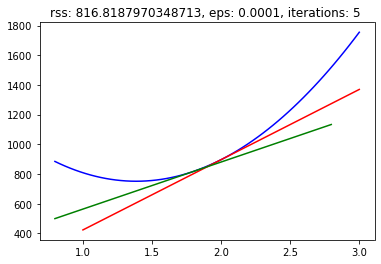

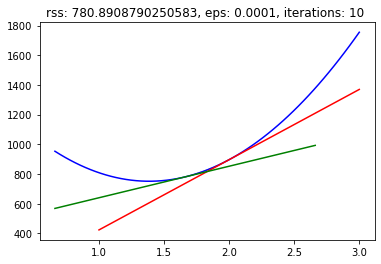

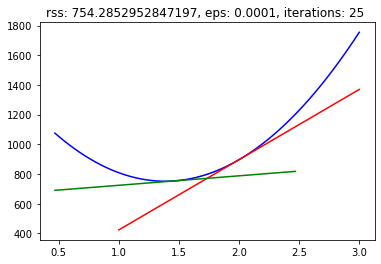

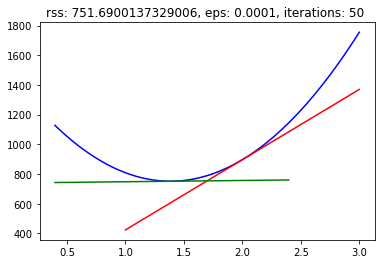

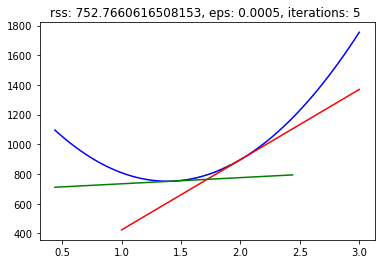

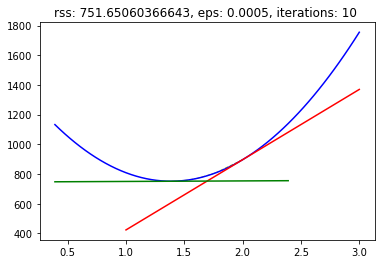

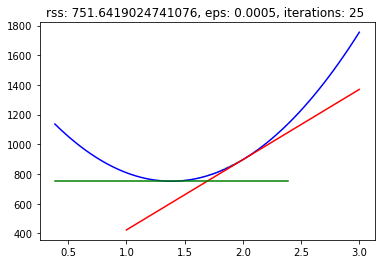

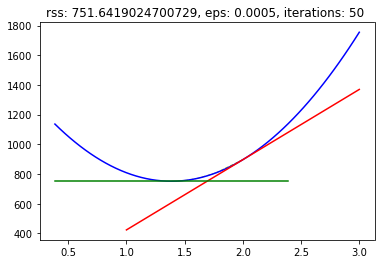

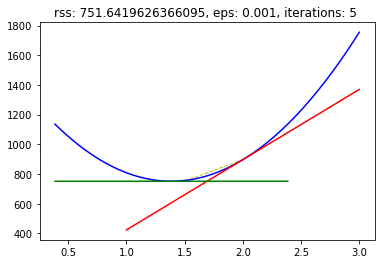

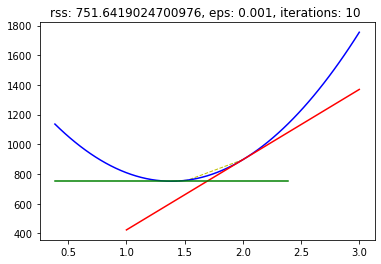

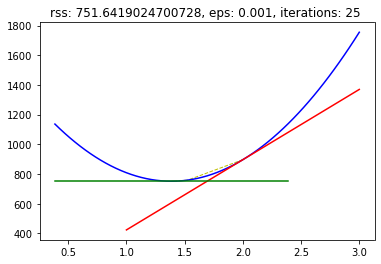

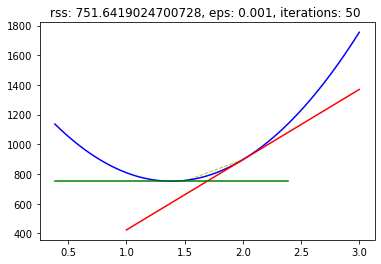

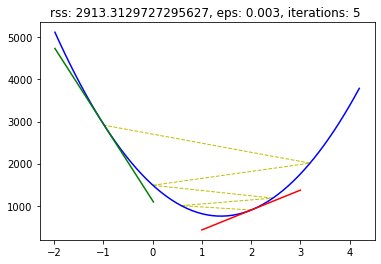

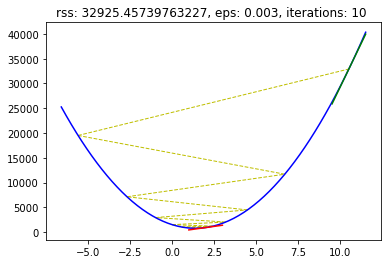

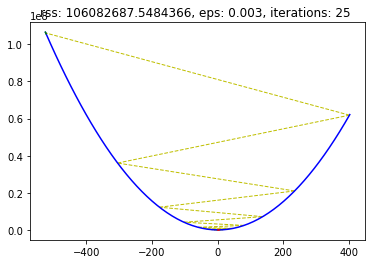

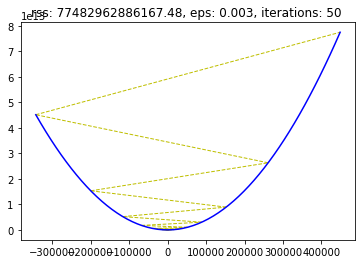

In [140]:
K = [5, 10, 25, 50] # iterations
learning_eps_list = [0.0001, .0005, 0.001, 0.003]
gridsearch = []

for learning_eps in learning_eps_list:
    for k in K:
        curr_a_s = grad_desc_rss(k, a0, learning_eps, f, ff, True)
        _rss = rss(curr_a_s[-1],X,Y)
        gridsearch.append({"rss":_rss,"a_s":curr_a_s[-1]})
        plt.title(f"rss: { str(_rss)}, eps: {learning_eps}, iterations: {k} ")
        plt.show()
        
best = sorted(gridsearch, key = lambda i: i['rss'])[0] 


In [141]:
print(best)

{'rss': 751.6419024700728, 'a_s': 1.3858026162587667}


### Try different learning rates and interpret the effect. Your answer goes here!*

Small learning rates are potentially "safer" in regards to not overshooting, but they could also take a long time to converge, or never converge. Also, a small learning rate is somewhat relative as well- a small learning rate for some optimization problem could be a large learning rate for a different problem.

Large learning rates take larger steps and therefore can potentially overshoot, meaning, they might "bounce" away to a part of the function that will make the optimization unstable. Another thing that could happen is it will converge quickly to a suboptimal part minima.

In the case of our example, we see that for a learning rate of .0001, it takes 50 iterations to accomplish the same thing that a learning rate of .0005 accomplishes in just 10 iterations, and which a learning rate of .001 accomplishes in 5 iterations. 

We see with a learning rate of .003 that the optimizations is unstable after just 5 iterations. 

*Final result*

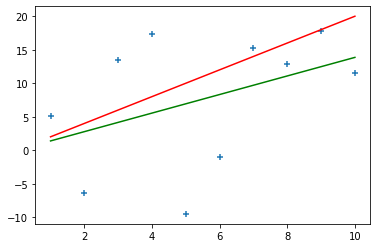

In [142]:
plt.scatter(X,Y,marker="+")
plt.plot(X,a0*X,'r')
plt.plot(X,best["a_s"]*X, 'g')
plt.show()

## Newton method with one variable

It is obviously difficult to set the learning rate right. To help this, the Newton method adjusts the learning rate $\varepsilon$ in each step to the inverse of the second derivative $h$ of the loss function. In our case it is the inverse of the second derivative of $RSS$.

$$
\begin{aligned}
h(a) &= \frac{\partial^2 RSS(a)}{\partial a^2}\\
&=\frac{\partial (-2 \sum_{i=1}^{n}(y_i- a x_i)x_i)}{\partial a}\\
&=2\sum_{i=1}^{n}x_i^2\\
\end{aligned}
$$

We observe, that $h$ is a constant w.r.t. $a$ and, hence, it does not change during iteration in our quadratic optimization case.

In [143]:
h = 2*np.sum(X**2)
learning_eps = 1/h
print(learning_eps)

0.0012987012987012987


[2.         1.38580262]


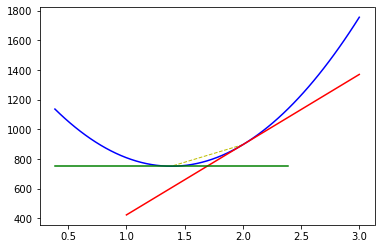

In [144]:
print(grad_desc_rss(1, a0, learning_eps, f, ff, True))

## Gradient descent with two (and more) variables

Let us add an intercept to linear model $Y = aX +b$ still with one feature $X$ and one response $Y$, but with slope $a$ and intercept $b$ to be learned.

We generate data for $Y=2X - 3$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

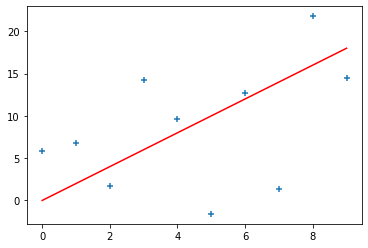

In [145]:
a0 = 2;
b0 = -3;
X = np.arange(N)
Y = a0*X + b0 + N*random_generator.standard_normal(X.shape)
plt.scatter(X,Y, marker="+")
plt.plot(X,a0*X,'r')
plt.show()

We learn $\hat a$ and $\hat b$ from the data and expect them to be $\approx 2$ and $\approx -3$, respectively. 
Therefore, we minimize the residual sum of squares $RSS=\sum_{i=1}^{n}(y_i-\hat a x_i - \hat b)^2$.  

Let's define and 3D plot the modified $RSS$ as a function of $a$ and $b$. We chose the ranges of $a$ and $b$ around the (actually unknown) minima of $\approx 2$ and $\approx -3$, respectively. 

In [146]:
def rss2(a, b, X, Y):
    return np.sum( (Y-(a*X)-b)**2)

In [147]:
def plot3d(f, A, B, real3d=True):
    Z = arrayfun2(f,A,B)
    if real3d:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        surf = ax.plot_surface(A, B, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    else:
        cs = plt.contour(A,B,Z)
        plt.clabel(cs, inline=True, fontsize=9)
        ax = cs.ax
    ax.set_xlabel("A")
    ax.set_ylabel("B")


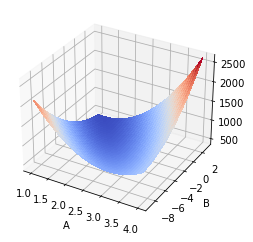

In [148]:
f = lambda a, b: rss2(a,b,X,Y)
a_range = np.linspace(a0-1,a0+2,61)
b_range = np.linspace(b0-6,b0+6,61)
A, B = np.meshgrid(a_range,b_range)
plot3d(f, A, B, True)

/Library/www/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


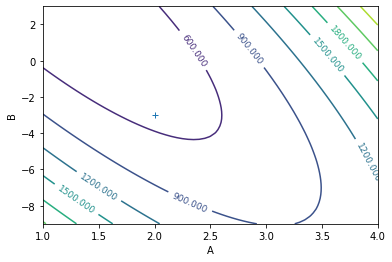

In [149]:
plot3d(f, A, B, False)
plt.plot(a0,b0,'+')
plt.show()

### What can you say about the loss function space?

Using the two plots for visual reference, we can see a few things with regard to the loss function space. 

1. The loss space appears to be convex, at least in the ranges that we have examined. This suggests there exists a global minima. However, the "floor" of the loss function appears long and relatively flat. This suggests that gradient descent will have a difficult time converging quickly because the gradient at the bottom will be small. A small gradient makes for slow convergence.

2. The ridges of the 3d plot show drastic changes (from blue to red). This visualization helps us see the effect of our loss function which is squaring the error. By squaring the error, we can more easily see the quadratic rise in error as we move the variables in those directions. If we had used a different loss function, say MAE, then the gradients would be much smaller in those areas and therefore the learning rate would be slower.

3. Our initialization of a and b places us right in the flat area of the loss function. This is a bad initialization because the gradient at that point is relatively flat which means our updates will be small and we will converge slowly. 

4. We can also see that the loss function is more sensitive to changes to "a". This is easy to see on the contour plot, for example going from 2 to 1.5 increases the loss by 300 whereas we would need to change b from approximately 5 to 6 to reach the same incrase in loss. 

The gradient of $RSS(a,b)$ for any $a, b$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a,b) &= \left [ \frac{\partial RSS(a,b)}{\partial a}, \frac{\partial RSS(a,b)}{\partial b}\right ]^T\\
&= \left [ \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial a}, 
           \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial b}\right ]^T \\
&= \left [ \sum_{i=1}^{n}2(y_i- a x_i-b)(-x_i),\sum_{i=1}^{n}2(y_i- a x_i-b)(-1) \right ]^T \\
&= \left [ -2\sum_{i=1}^{n}(y_i- a x_i-b)x_i,-2\sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T \\
&= -2 \left [ \sum_{i=1}^{n}(y_i- a x_i-b)x_i, \sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T 
\end{aligned}
$$

In [150]:
def grad_rss2(a,b,X,Y):
    n = len(X)
    grad_a = 0
    grad_b = 0
    tmp = Y - a*X - b
    for i in range(n):
        grad_a = grad_a + tmp[i] * X[i]
        grad_b = grad_b + tmp[i]
    grad_a = -2*grad_a
    grad_b = -2*grad_b
    return [grad_a, grad_b]

In [151]:
def grad_desc_rss2(K, a0, b0, learning_eps, f, ff, verbose):
    a_s = np.zeros(K+1)
    bs = np.zeros(K+1)
    a_s[0] = a0
    bs[0] = b0;
    for k in range(K):
        grad_w = ff(a_s[k],bs[k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        a_s[k+1] = a_s[k] - learning_eps * grad_a
        bs[k+1] = bs[k] - learning_eps * grad_b
        if verbose:
            plt.plot([a_s[k],a_s[k+1]],[bs[k],bs[k+1]], c="y", linestyle="dashed",linewidth=.4)
    if verbose:
        alow = min(np.amin(a_s), a0-2)
        ahigh = max(np.amax(a_s), a0+2)
        blow = min(np.amin(bs), b0-9)
        bhigh = max(np.amax(bs),b0)
        A,B = np.meshgrid(np.linspace(alow,ahigh,61), np.linspace(blow,bhigh,61))
        plot3d(f, A, B, False)
    return a_s, bs

/Library/www/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


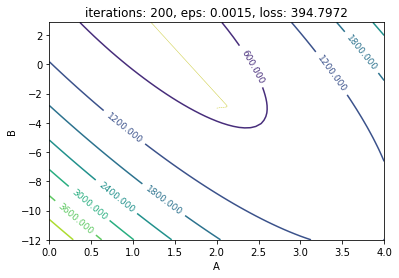

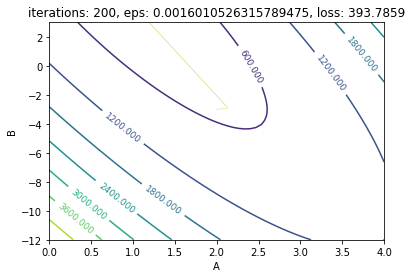

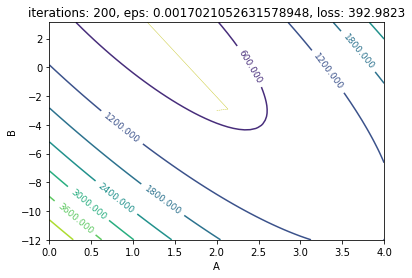

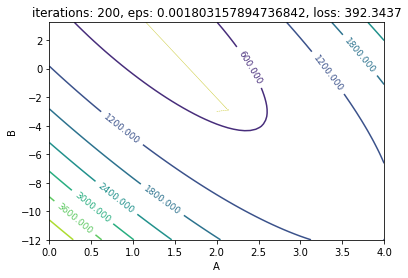

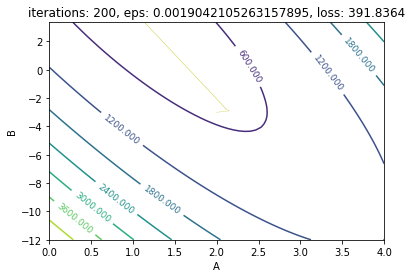

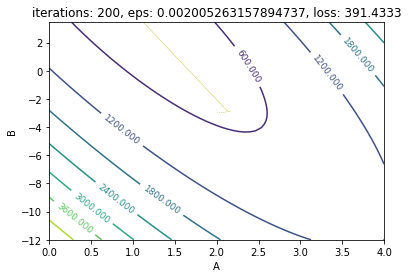

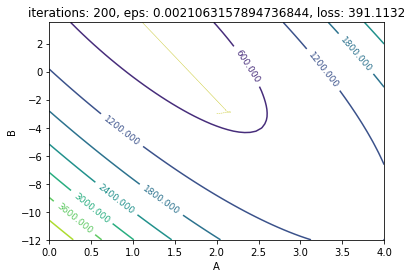

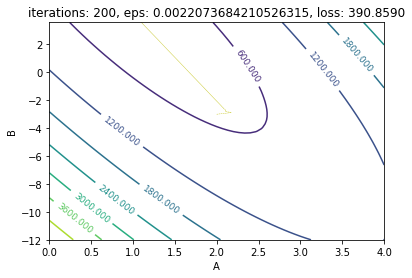

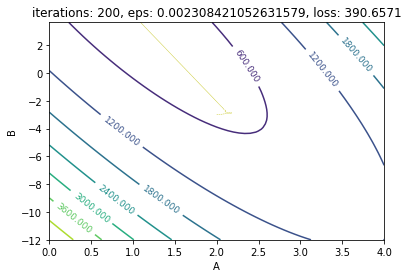

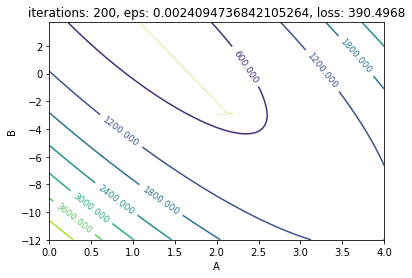

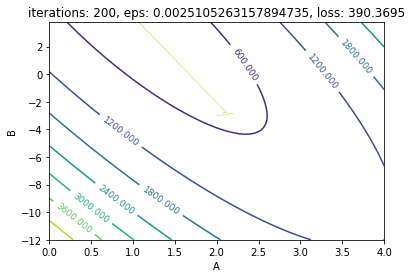

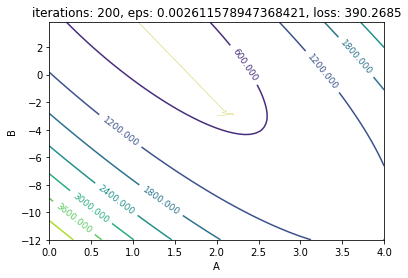

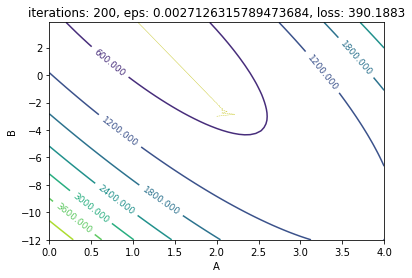

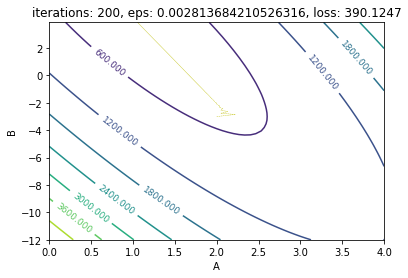

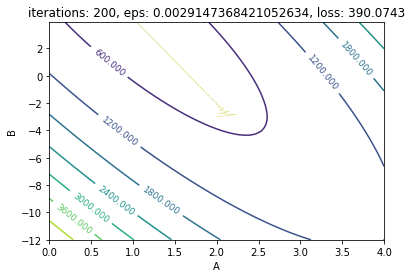

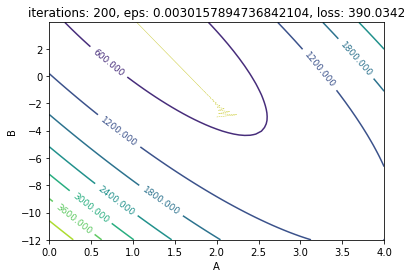

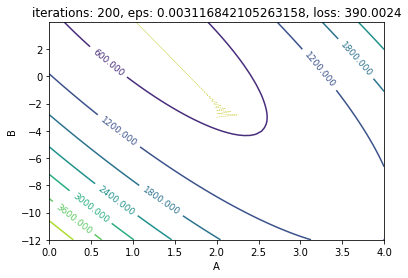

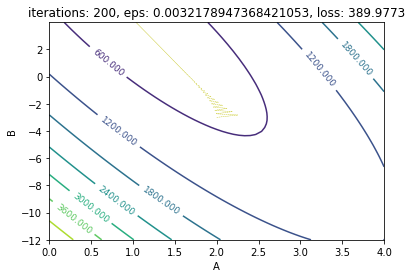

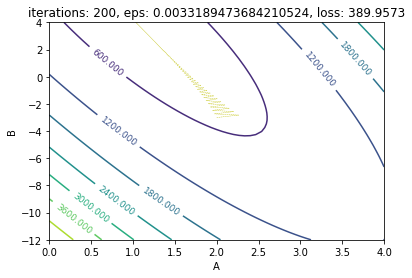

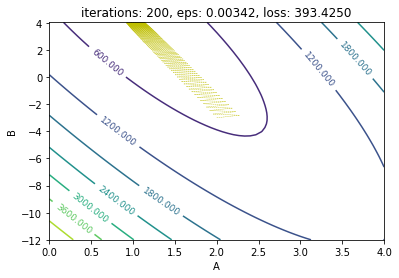

In [152]:
ff = lambda a,b: grad_rss2(a,b,X,Y)
# K = [100, 500, 1000]
k = 200
learning_eps = np.linspace(.0015,.00342,20)#[0.001, 0.0015, 0.002, 0.0025, .003, .0035]
loss_list = []
gridsearch = [] 
# for k in K:
for leps in learning_eps:
    a_s, bs = grad_desc_rss2(k, a0, b0, leps, f, ff, True);
    _rss = rss2(a_s[-1],bs[-1],X,Y)
    gridsearch.append({"a_s":a_s[-1],"bs":bs[-1],"rss":_rss, "eps":leps})
    loss_list.append(_rss)
    plt.title(f"iterations: {k}, eps: {leps}, loss: {_rss:.4f}")
    plt.plot()
    plt.show()

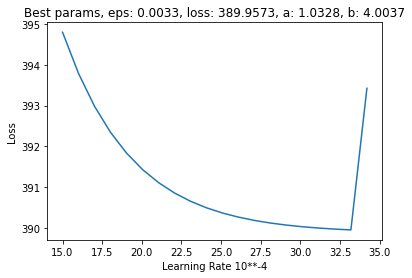

In [153]:
best = sorted(gridsearch, key = lambda i: i['rss'])[0]
plt.title(f"Best params, eps: {best['eps']:.4f}, loss: {best['rss']:.4f}, a: {best['a_s']:.4f}, b: {best['bs']:.4f}")
ax = plt.plot(learning_eps*10000,loss_list )
plt.xlabel("Learning Rate 10**-4")
plt.ylabel("Loss")
print("\n")
plt.show()

### *Try different learning rates and interpret the effect. Your answer goes here!*

In assessing the learning rate, I used k=200 iterations and then tried different learning rates between .0015 and .00342. The best learning rate I found was .0033 with a loss of 389.9573 and values of a=1.0328 and b=4.0037.

First, from the plot of loss against learn rate (plotted with values times 10**-4), we can see that the loss decreases rapidly and then flattens out as it approaches the optimal learning rate. However, as the learning rate increases above .0033 it explodes and becomes unstable. The plot shows this straight nearly-vertical straight line up to an epislon of of .00342 but if you extended the plot out the line would continue this trajectory.

The loss is sensitive to small incremental changes in the learning rate. Increasing the learning rate will decrease the loss in a quadratic way, even by adjustments of just .0001 or .00001, but at some point that same small tweak will lead to an exploding loss.

From the contour plots, we can see an oscillation between values of a and b as the learning rate increases. The loss at that point is decreasing very slowly. We also see that the last contour plate has a much thicker and wider oscillation compared to the previous contour plots (which look more like nice funnels). That learning rate is too large and we see that it's loss reverses the decrease and increases up to 393.

Final result

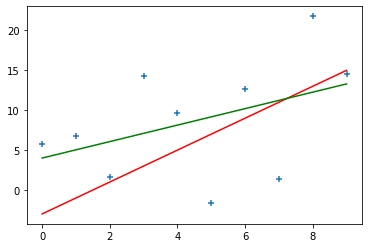

In [154]:
plt.scatter(X,Y,marker="+")
plt.plot(X,a0*X+b0,c="r")
plt.plot(X,best["a_s"]*X+best["bs"],c="g")
plt.show()

## Newton method with two (and more) variables

As in the case for one variable, we observe that $H_{RSS}$ is a constant matrix, i.e., it does not change during the iterations in our quadratic optimization case.

It is still difficult to set the learning rate right. To help this, the Newton method for one variable generalizes:

$$
[a_{k+1}, b_{k+1}] = [a_k,b_k] - H_{RSS}(a_k,b_k)^{-1} \nabla RSS(a_k,b_k) 
$$

where $H_{RSS}$ is the Hessian matrix of $RSS$. 

The Hessian matrix is defined as:
$$
\begin{aligned}
H_{RSS}(a,b) &= 
\begin{bmatrix}
\frac{\partial^2 RSS(a,b)}{\partial a^2} & \frac{\partial^2 RSS(a,b)}{\partial a \partial b} \\
\frac{\partial^2 RSS(a,b)}{\partial b \partial a} & \frac{\partial^2 RSS(a,b)}{\partial b^2} 
\end{bmatrix}\\
&=
\begin{bmatrix}
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial b} \\
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)) }{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b))}{\partial b} 
\end{bmatrix}\\
&=
\begin{bmatrix}
2\sum_{i=1}^{n}x_i^2 & 2\sum_{i=1}^{n}x_i \\
2\sum_{i=1}^{n}x_i & 2n
\end{bmatrix}\\
&=2
\begin{bmatrix}
\sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_i \\
\sum_{i=1}^{n}x_i & n
\end{bmatrix}\\
\end{aligned}
$$

In [155]:
H=np.zeros((2,2))
H[0,0]=2*sum(X**2)
H[0,1]=2*sum(X)
H[1,0]=H[0,1]
H[1,1]=2*N
H_inv = np.linalg.inv(H)
print(f"H\n{H}")
print(f"H_inv\n{H_inv}")

H
[[570.  90.]
 [ 90.  20.]]
H_inv
[[ 0.00606061 -0.02727273]
 [-0.02727273  0.17272727]]


Recall the inverse of a $2\times 2$ matrix $H$: 

$$
\begin{aligned}
H^{-1} &=\frac{1}{h_{11}h_{22}-h_{12}h_{21}}
\begin{bmatrix}
h_{22} & -h_{12} \\
-h_{21} & h_{11} 
\end{bmatrix}\\
\end{aligned}
$$

A learning rate $\varepsilon$ only scales the gradient vector; a Hessian matrix scales and rotates the gradient vector. Check how this concrete Hessian matrix transforms (scales and rotates) a unit vector:

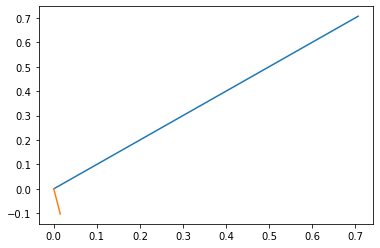

In [156]:
v = np.array([1/np.sqrt(2),1/np.sqrt(2)])
plt.plot([0,v[0]],[0,v[1]])
v2 = -H_inv @ v.T
plt.plot([0,v2[0]],[0,v2[1]])
plt.show()

In [157]:

def newton_rss2(K, a0, b0, H, f, ff, verbose):
    H_inv = np.linalg.inv(H)
    ab = np.zeros((2,K+1))
    ab[0,0] = a0;
    ab[1,0] = b0;
    for k in range(K):
        grad_w = ff(ab[0,k],ab[1,k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        ab[:,k+1] = ab[:,k] - H_inv @ np.array([grad_a, grad_b]).T
        if verbose:
            plt.plot([ab[0,k],ab[0,k+1]],[ab[1,k],ab[1,k+1]], c="y", linestyle="dashed",linewidth=.4)
    if verbose:
        alow = min(np.amin(ab[0,:]), a0-2)
        ahigh = max(np.amax(ab[0,:]), a0+2)
        blow = min(np.amin(ab[1,:]), b0-9)        
        bhigh = max(np.amax(ab[1,:]),b0)
        A,B = np.meshgrid(np.linspace(alow,ahigh,61), np.linspace(blow,bhigh,61))
        plot3d(f, A, B, False)
    return ab

ab_newton:
 [[ 2.          1.00690024  1.00690024]
 [-3.          4.16602017  4.16602017]]


/Library/www/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


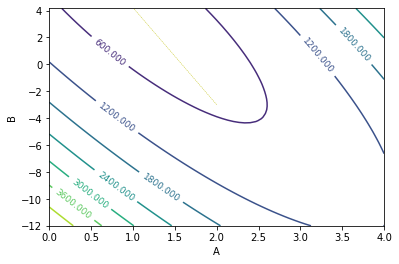

In [158]:
K=2
ab_newton = newton_rss2(K, a0, b0, H, f, ff, True)
print("ab_newton:\n",ab_newton)

In [159]:
rss_0 = f(a0,b0)
rss_opt = f(           ab_newton[0,ab_newton.shape[1]-1], ab_newton[1,ab_newton.shape[1]-1]  )

print(f"rss_0 =\n\n{rss_0}\n\nrss_opt =\n\n{rss_opt}")

rss_0 =

543.9882917967891

rss_opt =

389.88096968784913


The Newton method could overshoot the minimum (if the loss function is not convex or due to numerical errors). Therefore, the relaxed or damped Newton's method introduces a damping factor $0<\gamma \leq 1$. Also, we exit when we overshoot the optimum.

In [160]:
def damped_newton_rss2(K, a0, b0, H, gamma, f, ff, verbose):
    H_inv = gamma*np.linalg.inv(H)
    ab = np.zeros((2,K+1))
    ab[0,0] = a0;
    ab[1,0] = b0;
    for k in range(K):
        grad_w = ff(ab[0,k],ab[1,k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        ab[:,k+1] = ab[:,k] - H_inv @ np.array([grad_a, grad_b]).T
        if f(ab[0,k+1],ab[1,k+1]) >= f(ab[0,k],ab[1,k]):
            k=k-1
            break
        if verbose:
            plt.plot([ab[0,k],ab[0,k+1]],[ab[1,k],ab[1,k+1]], c="y", linestyle="dashed",linewidth=.4)
    if verbose:
        alow = min(np.amin(ab[0,:]), a0-2)
        ahigh = max(np.amax(ab[0,:]), a0+2)
        blow = min(np.amin(ab[1,:]), b0-9)        
        bhigh = max(np.amax(ab[1,:]),b0)
        A,B = np.meshgrid(np.linspace(alow,ahigh,61), np.linspace(blow,bhigh,61))
        plot3d(f, A, B, False)
            
    return ab

/Library/www/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


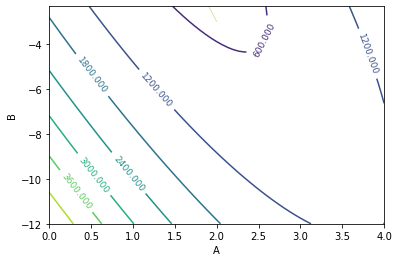

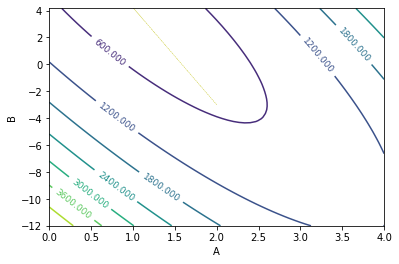

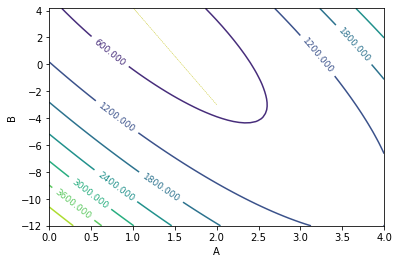

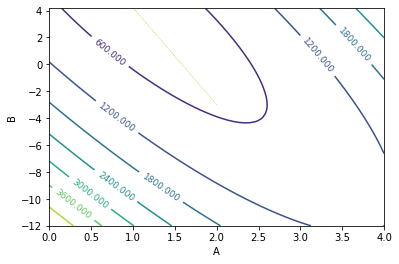

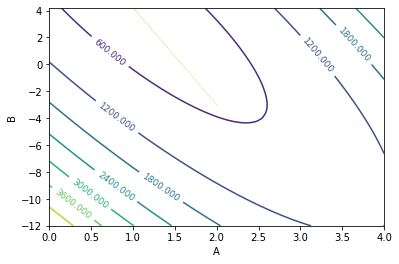

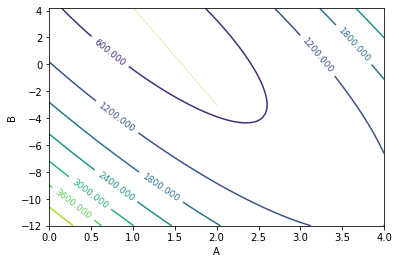

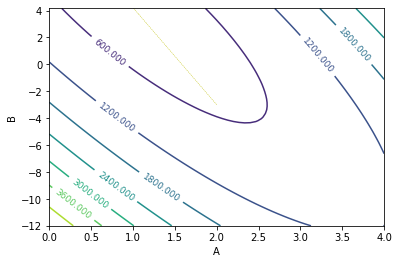

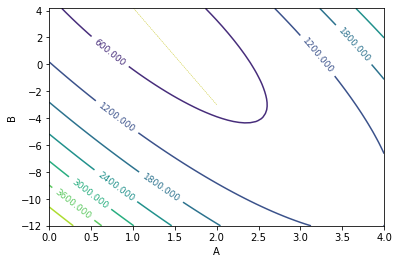

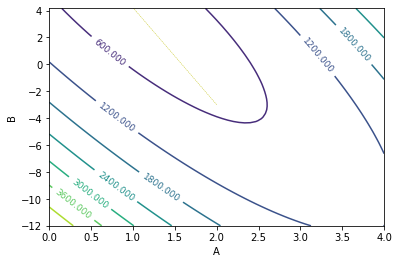

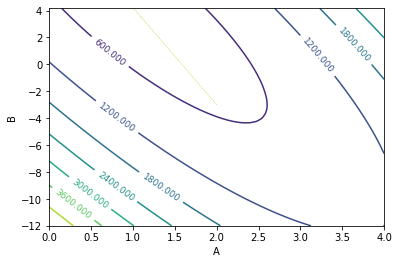

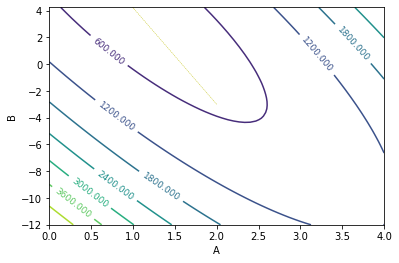

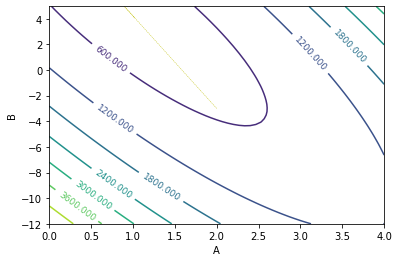

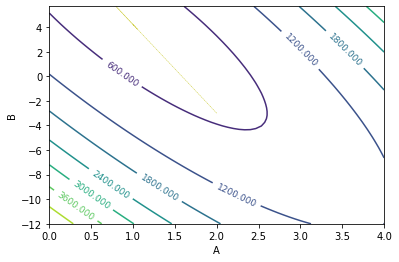

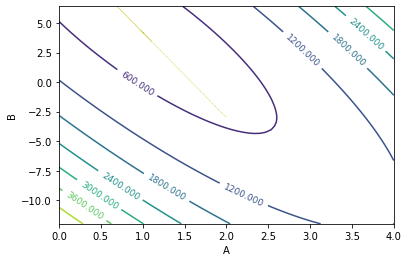

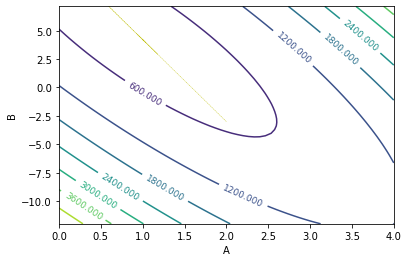

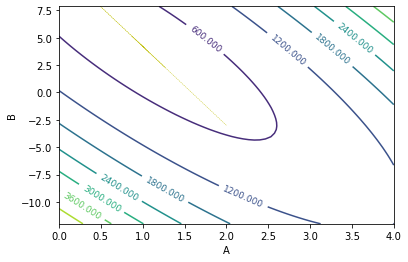

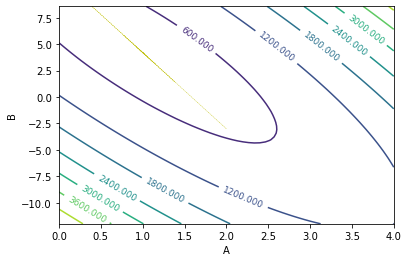

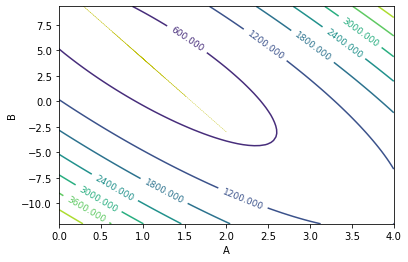

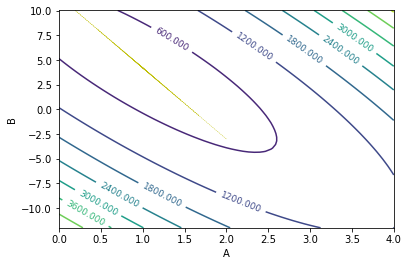

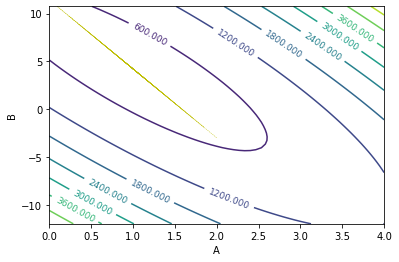

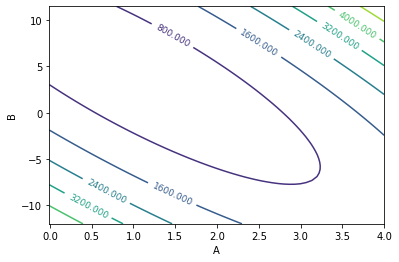

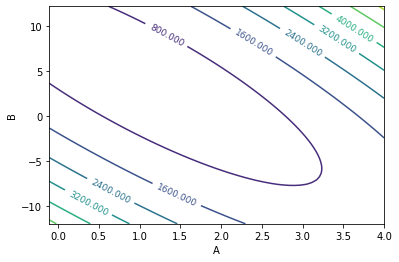

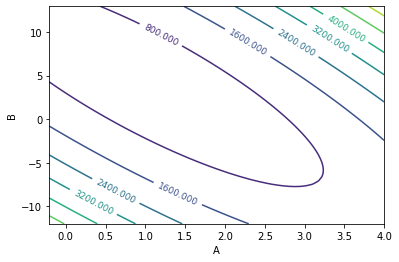

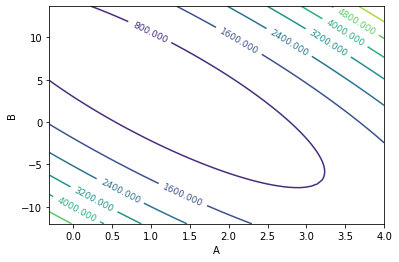

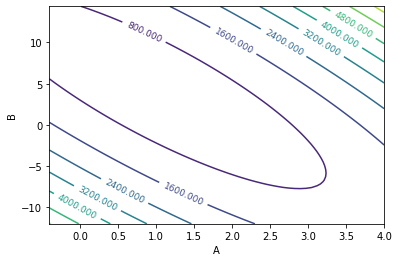

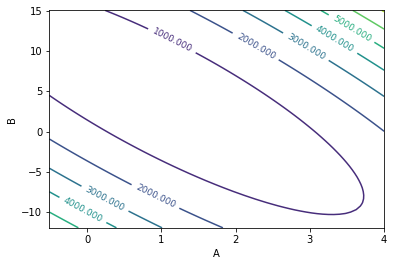

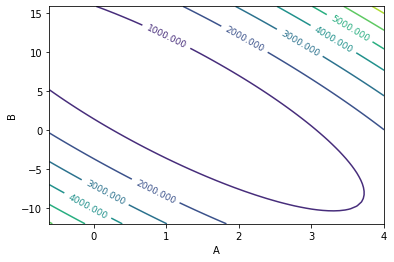

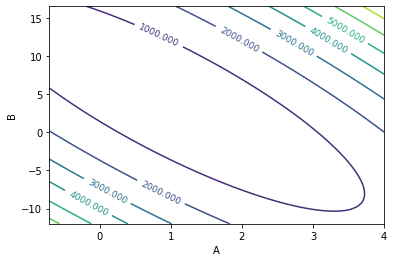

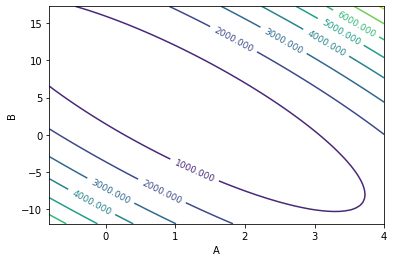

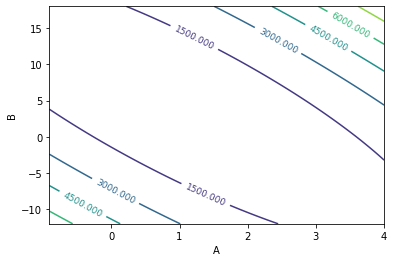

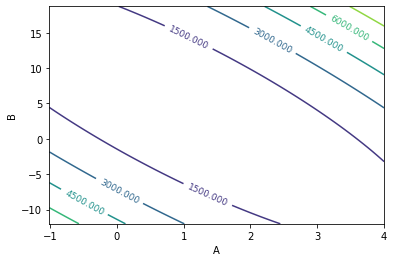

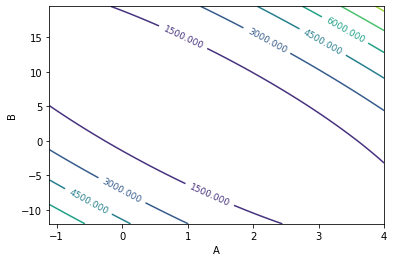

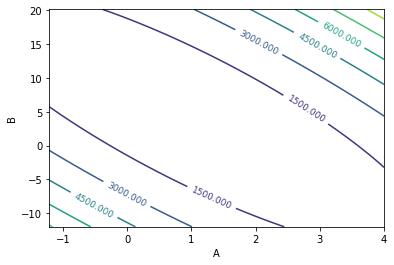

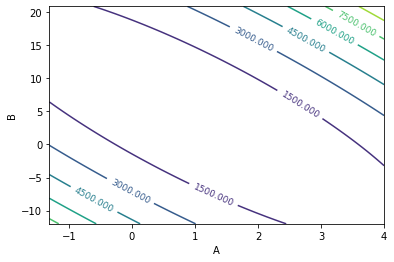

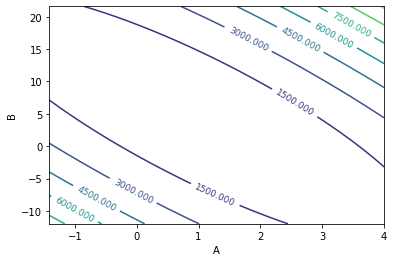

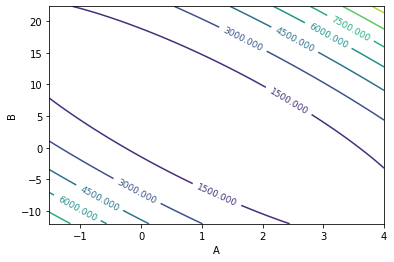

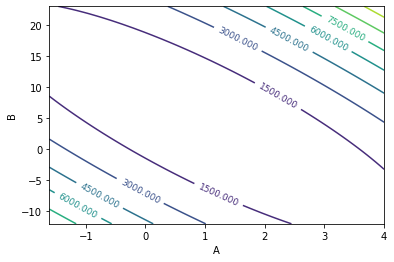

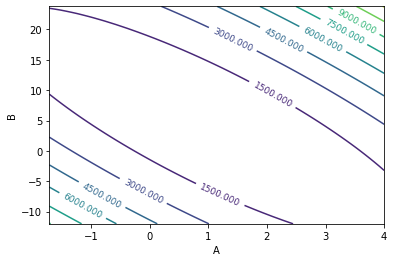

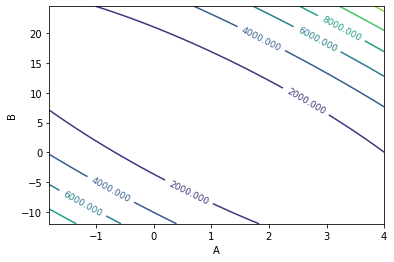

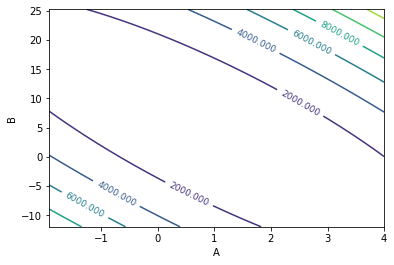

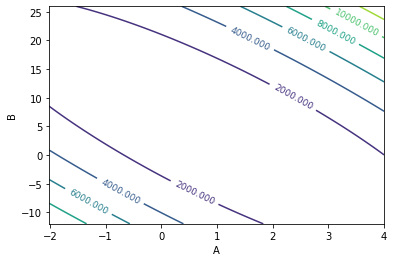

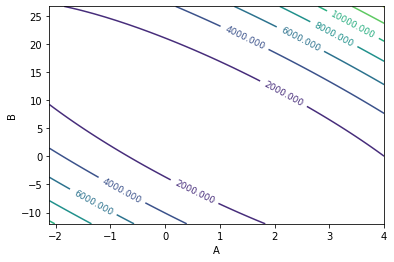

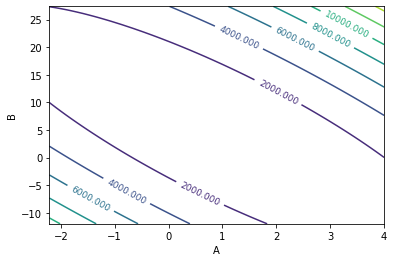

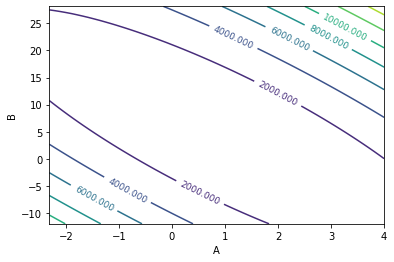

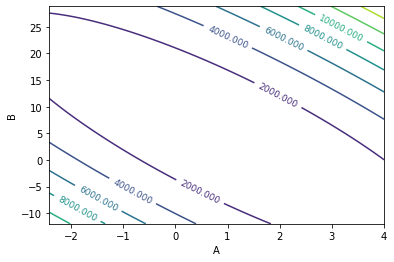

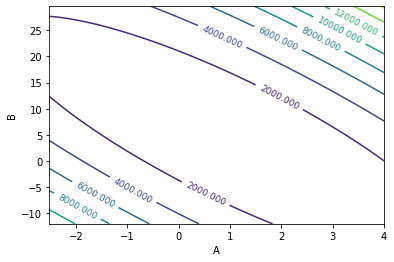

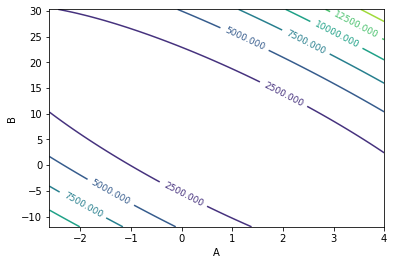

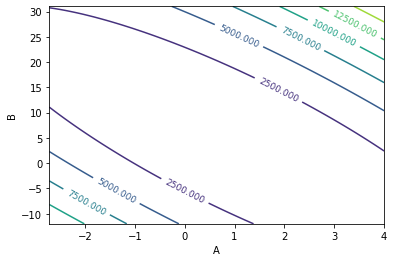

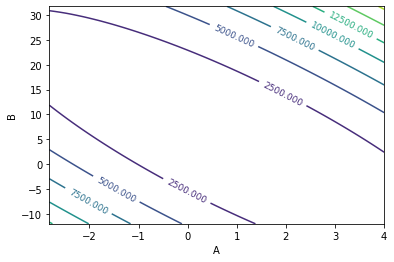

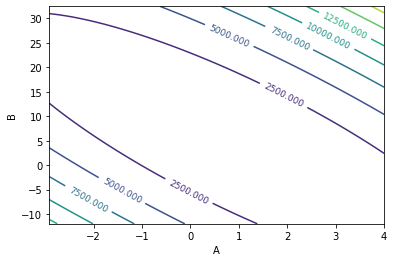

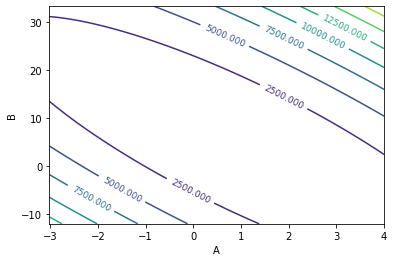

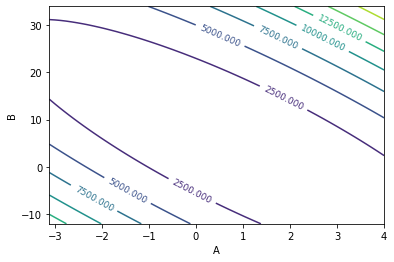

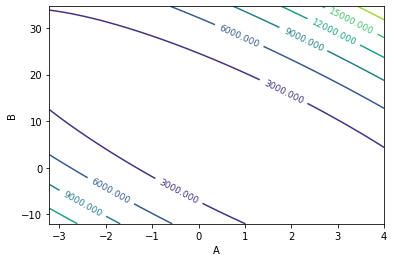

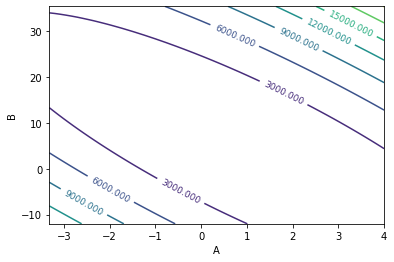

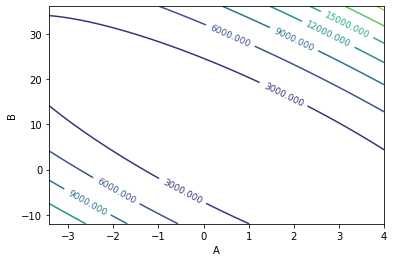

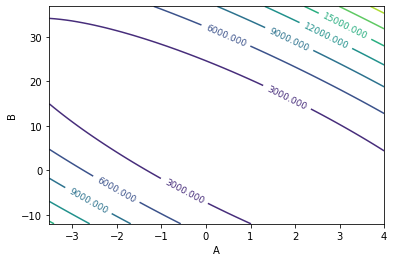

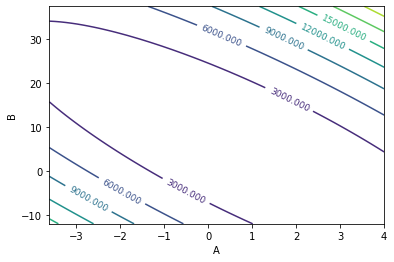

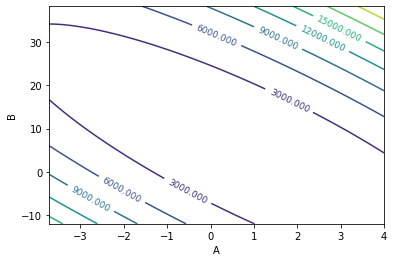

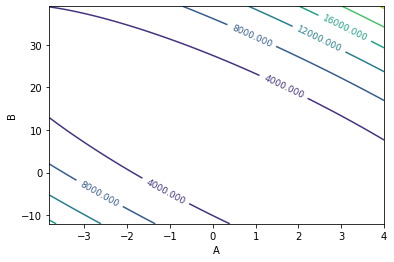

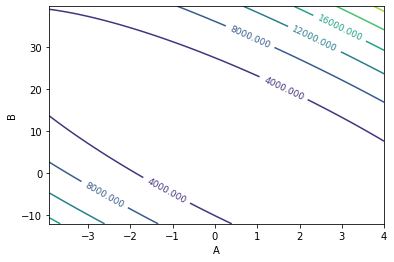

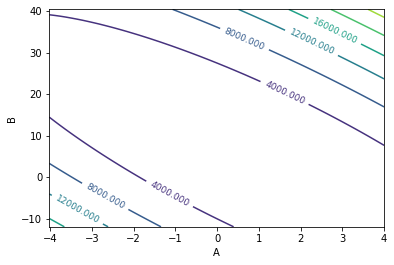

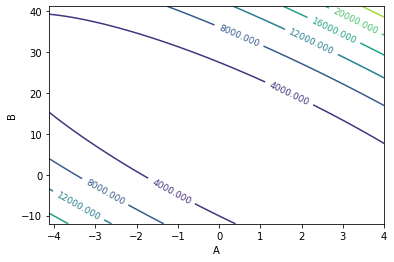

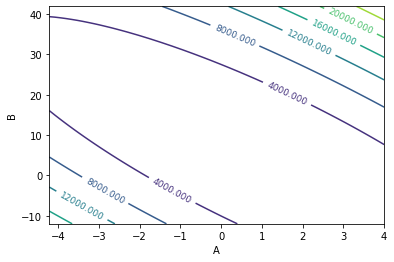

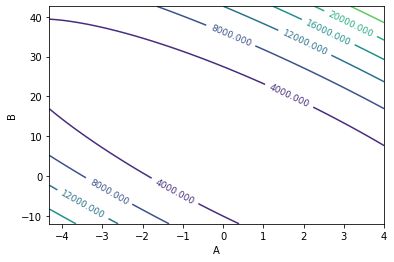

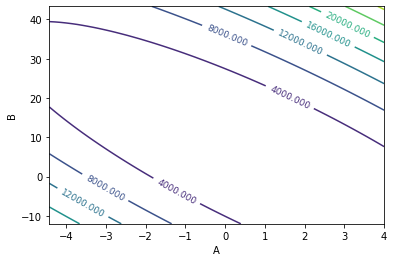

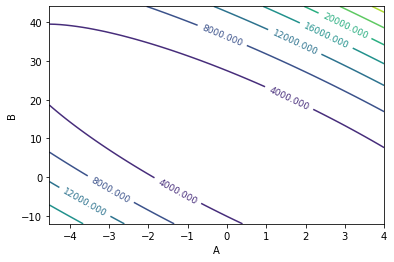

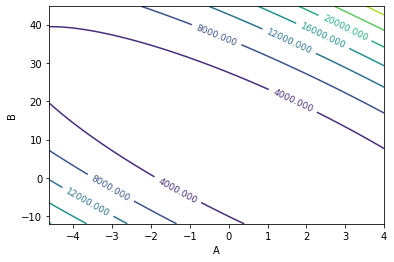

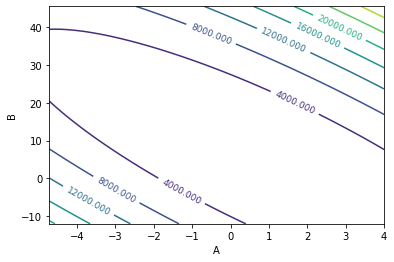

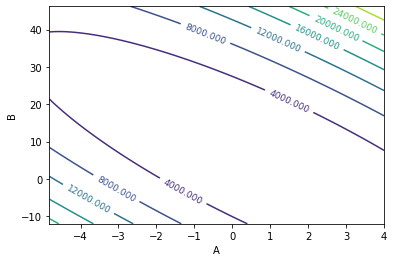

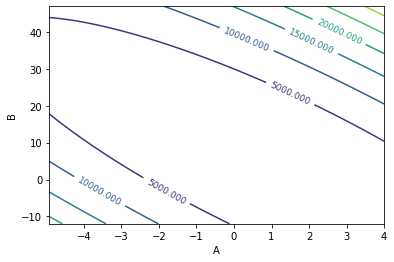

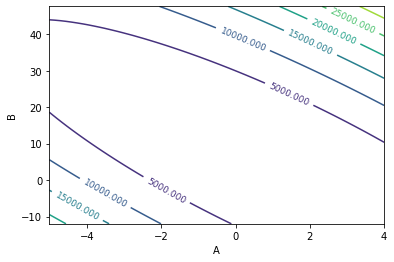

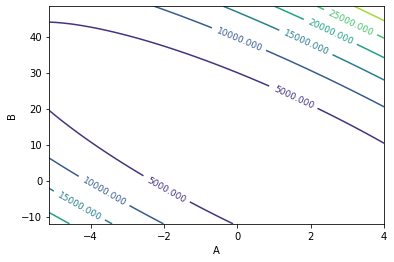

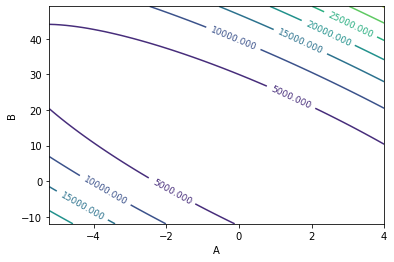

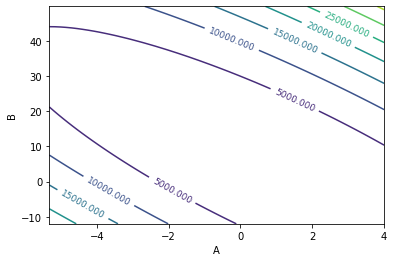

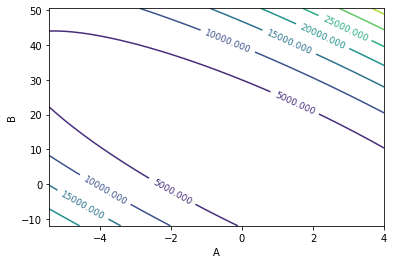

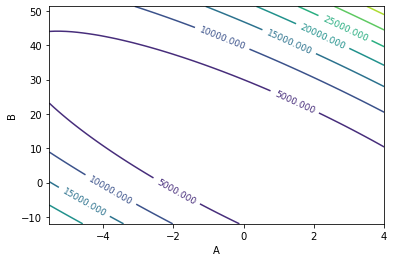

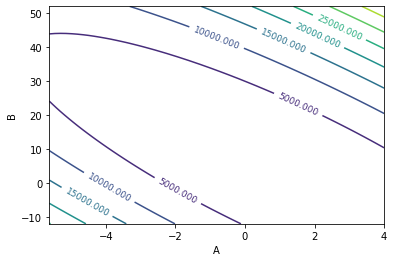

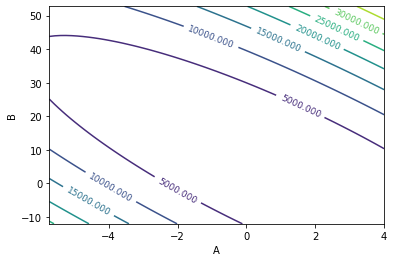

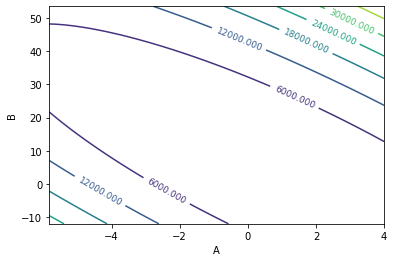

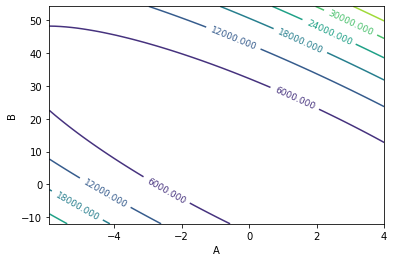

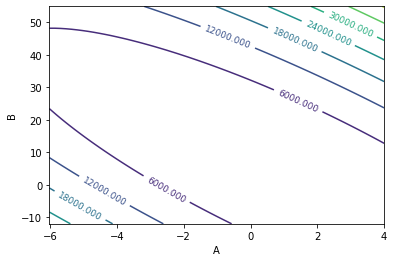

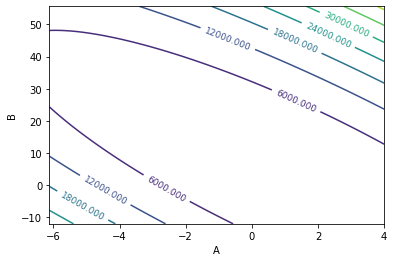

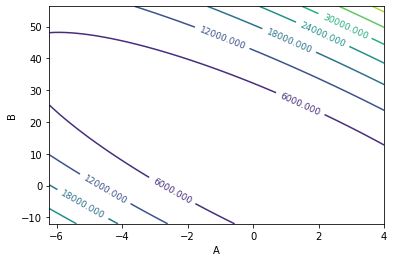

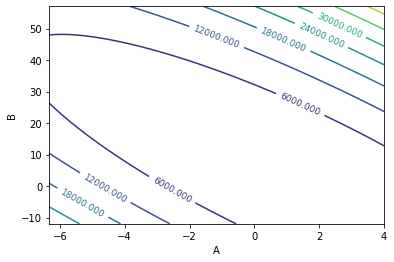

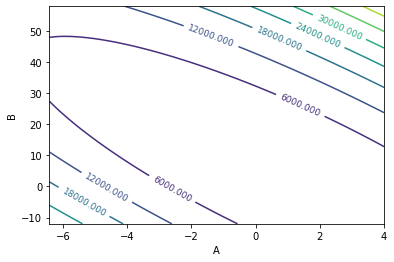

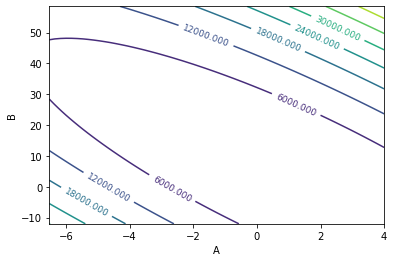

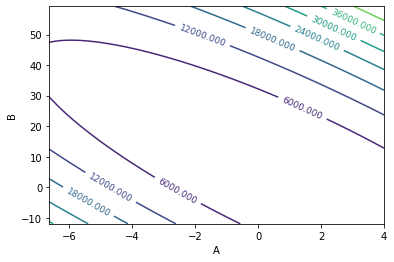

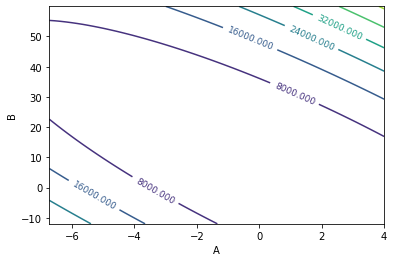

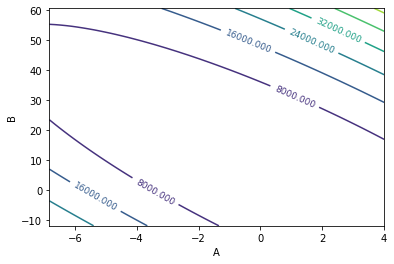

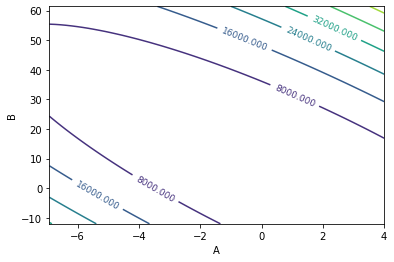

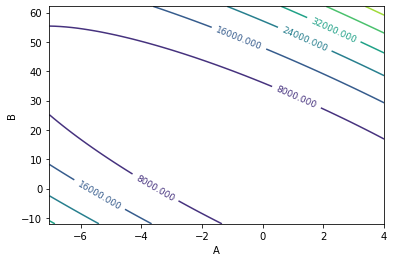

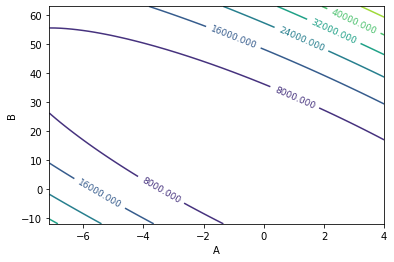

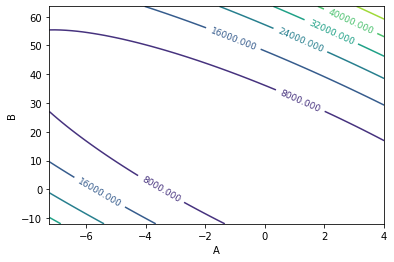

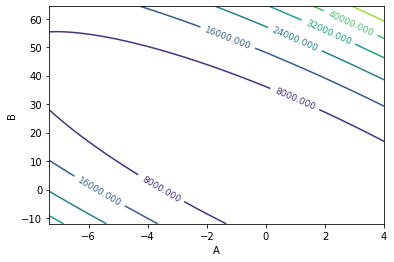

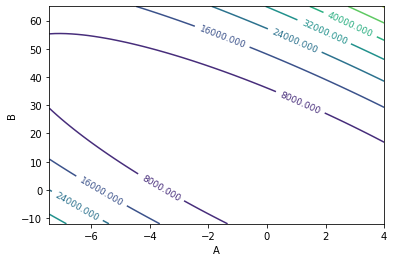

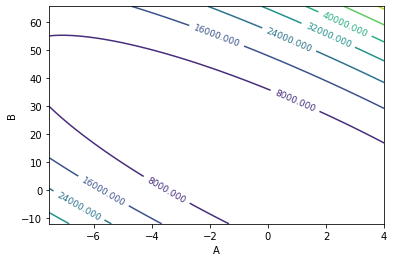

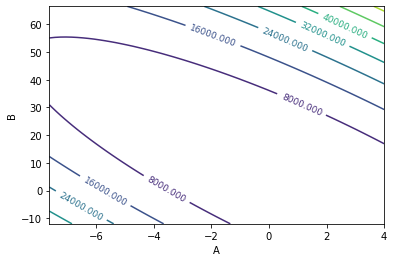

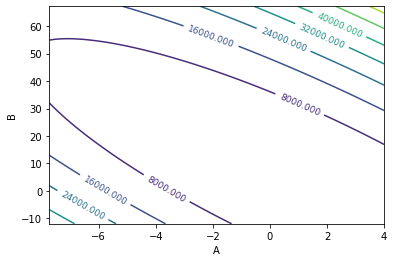

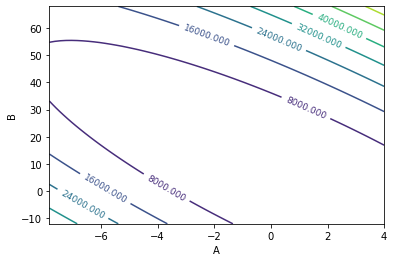

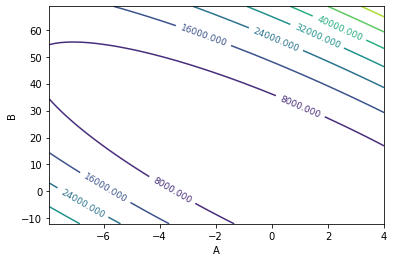

In [161]:
K=100
gamma_list =np.linspace(.001,10,100)
ab_newton_list = []
rss_opt_list = []
for gamma in gamma_list:
    ab_newton = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, True)
    iterations = len(np.trim_zeros(ab_newton[0]))
    rss_opt = f(np.trim_zeros(ab_newton[0])[-1], np.trim_zeros(ab_newton[1])[-1])
    ab_newton_list.append((ab_newton,iterations,rss_opt,gamma))
    plt.show()

In [162]:
bestrss = sorted(ab_newton_list, key=lambda x: x[2])
rssvals = np.array([x[2] for x in ab_newton_list])
gammavals = np.array([x[3] for x in ab_newton_list])
iterationvals = np.array([x[1] for x in ab_newton_list])

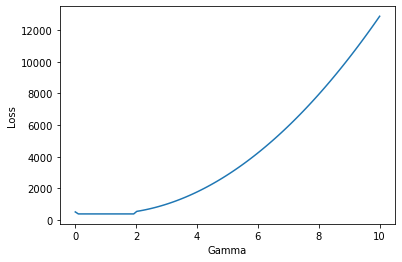

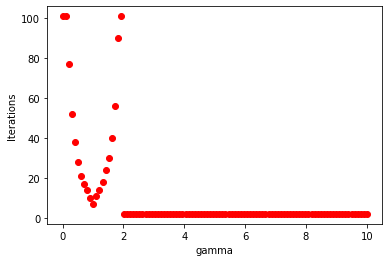

In [163]:
plt.plot(gammavals,rssvals,label="loss")
plt.ylabel("Loss")
plt.xlabel("Gamma")
plt.show()
plt.ylabel("Iterations")
plt.xlabel("gamma")
plt.scatter(gammavals,iterationvals,c="r", label="iterations")
plt.show()

In [164]:
ab_newton = bestrss[0][0]
rss_0 = f(a0,b0)
rss_opt = f(np.trim_zeros(ab_newton[0])[-1], np.trim_zeros(ab_newton[1])[-1])
print("rss_0",rss_0)
print("rss_opt",rss_opt)




rss_0 543.9882917967891
rss_opt 389.88096968784913


In [165]:
print("a", np.trim_zeros(ab_newton[0])[-1])
print("b", np.trim_zeros(ab_newton[1])[-1])
print("iterations",bestrss[0][1])
print("gamma",bestrss[0][3])


a 1.0069002483132725
b 4.166020138107896
iterations 38
gamma 0.405


### Try different damping factors and interpret the effect. Your answer goes here!*

I performed a search using k=100 iterations with 100 evenly spaced gamma values from .001 to 10.

The damping factor is used to prevent newton's method from overshooting the minimum. We can see from the plot of loss vs gamma, that for many of the gamma values, the minimal value is found- most gamma values from .1 to 2 achieve the minimal value. 

From the next plot of iterations vs gamma, we can see that the number of iterations used is different. From .1 to approximately 1, the num iterations reduces from 100 to 7 and then from ~1 to ~2, increases back up to 100. 

With these two ideas in mind we can say that newtons method is relatively insensitive to the gamma value because it is able to find the approximate minimum using any gamma from a wide range (between .1 and 2) of values. Given that enough iterations are provided, a small enough gamma might be able to find the minimum. 

Also we see that above a gamma of 2, the number of iterations used remains constant at 2. That means the minimum is overshot quickly and the algorithm can terminate. So newtons method "knows" rather quickly if it is working or not.

The damping factor of gamma above 2 in this case is an ever increasing loss. 

